## Importing libraries (useful things we'll use in the code later)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

## Setting up the data for our simulation

In [30]:
#Physical constants
g = 9.81                 #acceleration due to gravity         m/s^2

#Rocket parameters
Cd = 100                 #coefficient of drag  
A = 1                    #cross sectional area                m^2
F = 6.7e6                #thrust (Rocketdyne F-1 engine)      N
mdF1 = 2600              #mass flow rate of F-1 engine        kg/s
m_dry = 10000            #dry-mass                            kg
m_fuel = 10000           #mass of fuel                        kg 
m_wet = m_dry+m_fuel     #wet-mass                            kg



## Atmospheric Model

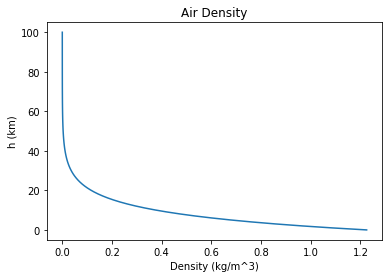

In [24]:
#Atmospheric model
H = 8500                 #scale height                        m
rho0 = 1.225             #air density at sea level            kg/m^3
r0 = 6370e3              #Earth's radius                      m

#Exponential model of air density as function of radius
def rho(r): return rho0*np.exp(-(r-r0)/H)
#Plot of air density against altitude
hs = np.linspace(0,100,100)
rhos = rho(6370e3+hs*1e3)
plt.plot(rhos,hs)
plt.title("Air Density"),plt.xlabel("Density (kg/m^3)"),plt.ylabel("h (km)")
plt.show()

## System dynamics - the equations that we want to solve numerically
**Don't touch this code**

In [32]:
 #state vector X, function returns dX/dt for given X
    #v, velocity 
    #y, angle between velocity and local vertical
    #r&th, Earth centred polar coordinates 
    #m, mass
    
def sys_dynamics(t,X):
    v,y,r,th,m=X[0:6]
    vd = F/m -g*np.cos(y)-1/2*rho(r)*Cd*A*v**2
    if v != 0:
        yd = (m*g)/v*np.sin(y)
    else: 
        yd = 0
    rd = v*np.cos(y)
    thd = r*v*np.sin(y)
    if m>m_dry:
        md = -mdF1
    else:
        md=0

    return [vd,yd,rd,thd,md]

X0=[0,0,6370e3,0,m_wet]
sys_dynamics(0,X0)


[325.19, 0, 0.0, 0.0, 2600]